# Plot viral transcription in infected cells

Import Python modules:

In [3]:
from IPython.display import display

from dms_variants.constants import CBPALETTE

from alignparse import *

from Bio.Seq import Seq

import numpy

import pandas as pd

import plotnine as p9

import scanpy

import scipy

import statsmodels.stats.multitest

import subprocess

In [5]:
p9.theme_set(p9.theme_classic())
CBPALETTE_rich = ['#D81B60', '#1E88E5', '#FFC107', '#004D40']

## Read integrated data
The general structure of the dataframe is that each cell barcode is listed on a row, and features of that cell are listed in columns.
Cells that have more than one valid viral barcode identified may have multiple rows--one for each valid viral barcode.

In [4]:
integrated_data_csv = 'results/viral_fastq10x/scProgenyProduction_trial3_integrate_data.csv'

integrated_data = pd.read_csv(integrated_data_csv)

integrated_data

,cell_barcode,infected,infecting_viral_tag,total_UMIs,viral_UMIs,frac_viral_UMIs,n_viral_genes,transcriptome_UMIs_fluHA,transcriptome_UMIs_fluM,transcriptome_UMIs_fluNA,...,barcoded_gene,viral_barcode,viral_bc_UMIs,frac_viral_bc_UMIs,freq_second_infection,freq_supernatant,max_freq_second_infection,max_freq_supernatant,contributes_progeny_second_infection,contributes_progeny_supernatant
0,AAACCCAGTAACAAGT,uninfected,none,47873,6,0.000125,0,2,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAACCCATCATTGCTT,uninfected,none,90114,10,0.000111,1,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAACGAAAGATGTTGA,uninfected,none,111630,18,0.000161,0,3,10,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAACGAAGTACTTCCC,infected,both,56828,24082,0.423770,7,2,13060,420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAACGAAGTAGACGTG,infected,wt,124341,4654,0.037429,8,319,1582,31,...,fluHA,AAGTAAGCGACATGAG,251.0,0.002019,0.000010,0.000076,0.000010,0.000076,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,TTTGATCTCCCGTTCA,uninfected,none,63150,3,0.000048,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3678,TTTGGAGAGTTGCCTA,uninfected,none,65941,12,0.000182,1,0,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3679,TTTGGAGGTATCGTTG,infected,wt,150130,3526,0.023486,8,93,1668,45,...,fluHA,AGTAAACTTCCTCGCG,65.0,0.000433,0.000010,0.000695,0.000028,0.001790,True,True
3680,TTTGGAGGTATCGTTG,infected,wt,150130,3526,0.023486,8,93,1668,45,...,fluNA,ACATCTTATTTACACG,39.0,0.000260,0.000028,0.001790,0.000028,0.001790,True,True


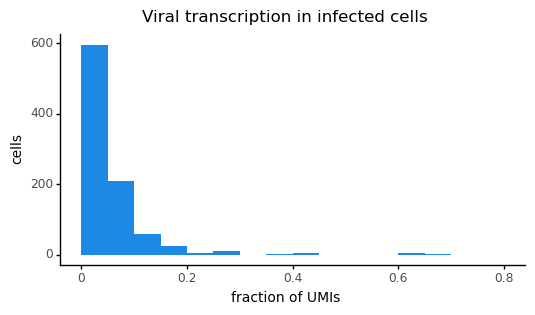

<ggplot: (8789636090742)>

In [28]:
fig = (p9.ggplot((integrated_data
                  .query('infected == "infected" and infecting_viral_tag != "both"',
                         engine='python')),
                 p9.aes(x='frac_viral_UMIs')) +
       p9.geom_histogram(breaks=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8],
                         fill=CBPALETTE_rich[1]) +
       p9.ggtitle(f'Viral transcription in infected cells') +
       p9.labs(x='fraction of UMIs',
               y='cells') +
       p9.theme(figure_size=(6, 3),
                plot_title=p9.element_text(size=12),
                axis_title=p9.element_text(size=10),
                legend_title=p9.element_text(size=10),
                legend_title_align='center'))
display(fig)